#  Facial Expression Recognization

## 1. Introduction

Facial expression recognition is a fascinating field of computer vision that involves training machines to identify human emotions based on facial cues. This technology has applications in various domains, such as security, marketing, healthcare, and entertainment. The project involves using deep learning techniques to develop a facial expression recognition model that can accurately identify emotions such as happiness, sadness, anger, surprise, fear, and disgust.

## 2. Dataset 
This dataset consists of over 35,000 grayscale images of faces that are labeled with one of seven emotions: anger, disgust, fear, happiness, sadness, surprise, and neutral. The images are in various resolutions and were collected from the internet.

link: https://www.kaggle.com/datasets/aadityasinghal/facial-expression-dataset?datasetId=1060020

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

from keras import backend as K
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import splitfolders
import plotly.express as px
from IPython.display import Image



In [2]:
for folder in folders:
    cls_scr=os.path.join('\test',folder)
    cls_dis=os.path.join(r'C:\Users\P1\Desktop\Project\CNN\train',folder)
    for file in os.listdir(cls_scr):
            scr=os.path.join(cls_scr,file)
            dis=os.path.join(cls_dis,file)
            shutil.move(scr,dis)

In [ ]:
# import zipfile
# with zipfile.ZipFile("train.zip","r") as zip_ref:
#     zip_ref.extractall('data')

In [ ]:
splitfolders.ratio('train', output="dataset",  ratio=(.65, 0.20,0.15)) 

# 3. EDA

In [3]:
folders=os.listdir(r'C:\Users\P1\Desktop\Project\CNN\train')
df=pd.DataFrame()
images=[]
cls=[]


for folder in folders:
    dir=os.path.join(r'C:\Users\P1\Desktop\Project\CNN\train',folder)
    value=len(os.listdir(dir))
    images.append(value)
    cls.append(folder)


df['images']=images
df['class']=cls

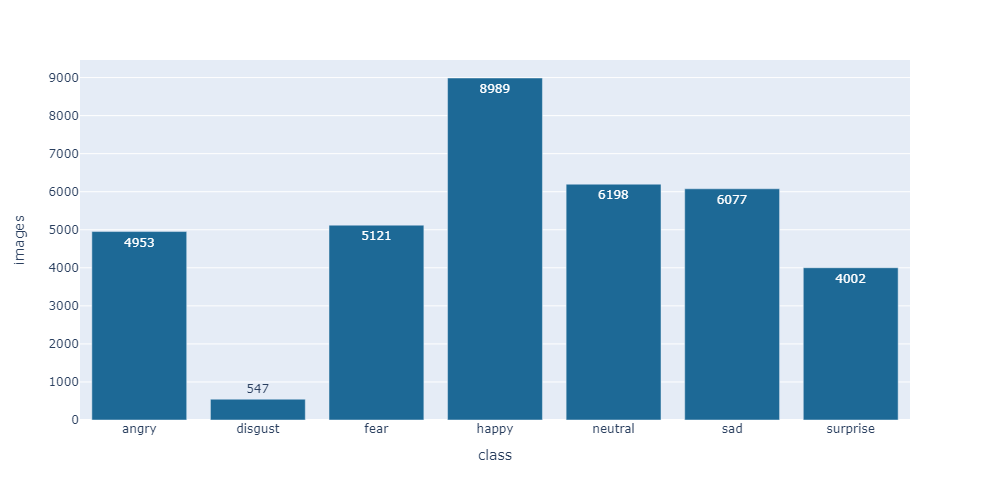

In [4]:
fig=px.bar(df,x='class',y='images',color_discrete_sequence=px.colors.qualitative.Prism[1:2],text='images',width=990)
fig.show()

## run this code if fig.show does not work
# img_bytes = fig.to_image(format="png")
# Image(img_bytes)

In [2]:

# Dimensions of the images
img_width, img_height = 48, 48

# Define the directories for the train, validation, and test data
train_data_dir = 'dataset/test'
validation_data_dir = 'dataset/val'
test_data_dir = 'dataset/train'



# Number of training examples
nb_train_samples = sum([len(files) for r, d, files in os.walk(train_data_dir)])

# Number of validation examples
nb_validation_samples = sum([len(files) for r, d, files in os.walk(validation_data_dir)])

# Number of test examples
nb_test_samples = sum([len(files) for r, d, files in os.walk(test_data_dir)])

# Number of classes
nb_classes = len(os.listdir(train_data_dir))

# Batch size
batch_size = 16

# Number of epochs
nb_epoch = 100

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

# Define data generators for the train, validation, and test data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2)

validation_datagen = ImageDataGenerator(rescale=1. / 255)

test_datagen = ImageDataGenerator(rescale=1. / 255)

# Generate the training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Generate the validation data
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Generate the test data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')






Found 5390 images belonging to 7 classes.
Found 7174 images belonging to 7 classes.
Found 23323 images belonging to 7 classes.


In [20]:
label_map = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


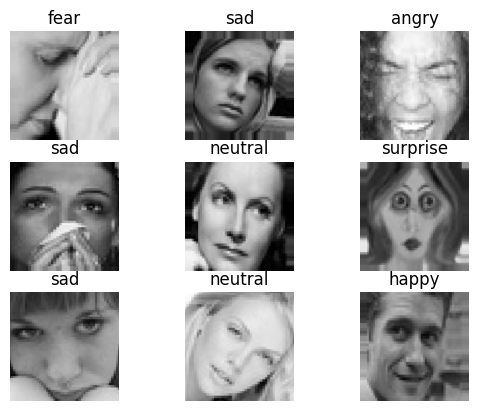

In [27]:
images, labels = next(train_generator)
class_indices = np.argmax(labels, axis=1)

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(label_map[class_indices[i]])
    plt.axis("off")

# 4. Model Building  
### Model Used : 'Convolutional Neural Networks (CNN)' 
I chose CNN because it is a powerful and effective deep learning architecture for image classification, and it turns out its results are better than those of the other algorithms.

#### Assumtions
- There is no assumptions defined.

## Model 1 
- Model1: Training the model without additional technique such as transfer learning.

### Model 1 Building 

In [ ]:

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Model Training

In [3]:

              
# Train the model
model1=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=nb_epoch,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

# Evaluate the model on the test data
score = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Save the model
#model.save('model.h5')


C:\Users\P1\AppData\Local\Temp\ipykernel_19824\2906291136.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model1=model.fit_generator(


Epoch 1/100
336/336 [==============================] - 21s 34ms/step - loss: 1.8532 - accuracy: 0.2348 - val_loss: 1.8151 - val_accuracy: 0.2504
Epoch 2/100
336/336 [==============================] - 6s 19ms/step - loss: 1.8244 - accuracy: 0.2490 - val_loss: 1.8075 - val_accuracy: 0.2528
Epoch 3/100
336/336 [==============================] - 6s 18ms/step - loss: 1.7976 - accuracy: 0.2536 - val_loss: 1.7496 - val_accuracy: 0.2794
Epoch 4/100
336/336 [==============================] - 7s 20ms/step - loss: 1.7554 - accuracy: 0.2851 - val_loss: 1.7121 - val_accuracy: 0.3154
Epoch 5/100
336/336 [==============================] - 8s 24ms/step - loss: 1.7114 - accuracy: 0.3109 - val_loss: 1.6567 - val_accuracy: 0.3531
Epoch 6/100
336/336 [==============================] - 9s 26ms/step - loss: 1.6874 - accuracy: 0.3349 - val_loss: 1.6207 - val_accuracy: 0.3525
Epoch 7/100
336/336 [==============================] - 8s 25ms/step - loss: 1.6444 - accuracy: 0.3439 - val_loss: 1.5706 - val_accuracy

C:\Users\P1\AppData\Local\Temp\ipykernel_19824\2906291136.py:36: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Test loss: 1.3369914293289185
Test accuracy: 0.5079358220100403


### Performance Report

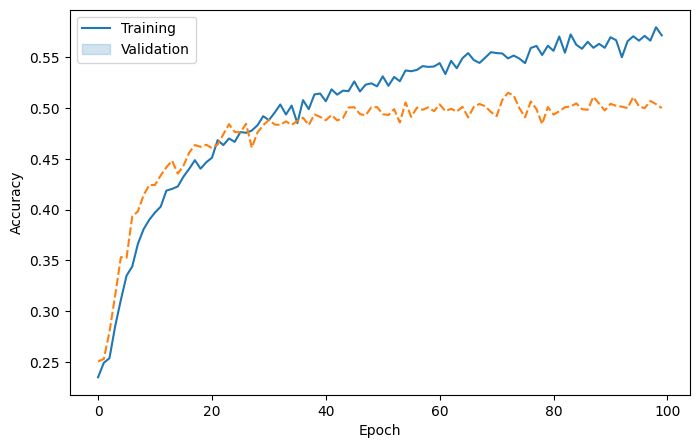

In [4]:
model_hist = pd.DataFrame(model1.history)

plt.figure(figsize=(8, 5))
sns.lineplot(data=model_hist[['accuracy', 'val_accuracy']])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])


# fig=px.bar(model_hist,x='class',y='accuracy',color_discrete_sequence=px.colors.qualitative.Prism[1:2],text='images',width=990)
# img_bytes = fig.to_image(format="png")
# Image(img_bytes)


<AxesSubplot: >

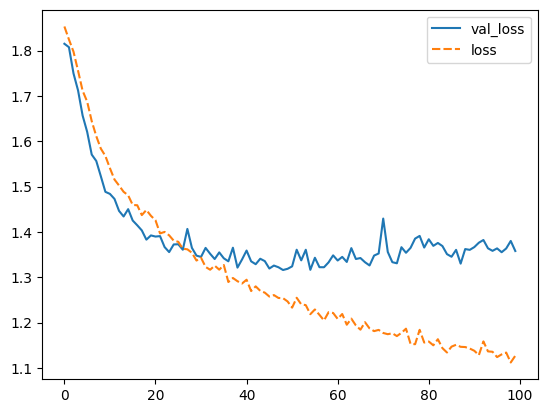

In [5]:
sns.lineplot(data=model_hist[['val_loss', 'loss']])


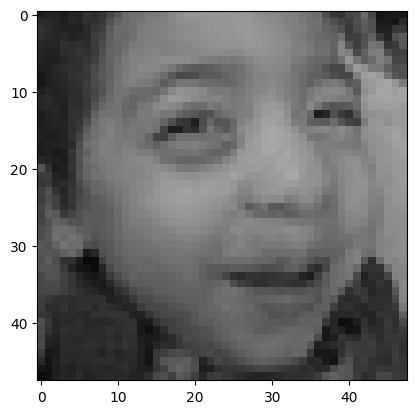

In [21]:
x_test, y_test = next(test_generator)
image_test = x_test[0]
image_test = image_test.reshape((1,) + image_test.shape)
plt.imshow(np.squeeze(image_test))

In [22]:
prediction=model.predict(image_test)
print("The actual value is:  "+ label_map[np.argmax(y_test[0])])
print("The predection value is:  "+ label_map[np.argmax(prediction, axis=1)[0]])

The actual value is:  happy
The predection value is:  sad


## Model 2
- Model 2: Training the model with pretrained model that has been trained on VGG19 architecture.
### Model 2 Building 

In [ ]:
from tensorflow.keras.applications import VGG19

vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

model2 = Sequential()

model2.add(vgg19)

model2.add(Flatten())
model2.add(Dense(64))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(nb_classes))
model2.add(Activation('softmax'))
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Model Training

In [66]:


# Train the model
model_2 = model2.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=nb_epoch,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

score = model2.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/100


C:\Users\P1\AppData\Local\Temp\ipykernel_19824\3514211482.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_2 = model2.fit_generator(


336/336 [==============================] - 19s 54ms/step - loss: 1.9444 - accuracy: 0.2110 - val_loss: 1.8129 - val_accuracy: 0.2504
Epoch 2/100
336/336 [==============================] - 17s 50ms/step - loss: 1.8363 - accuracy: 0.2352 - val_loss: 1.8182 - val_accuracy: 0.2503
Epoch 3/100
336/336 [==============================] - 20s 60ms/step - loss: 1.8281 - accuracy: 0.2473 - val_loss: 1.8109 - val_accuracy: 0.2507
Epoch 4/100
336/336 [==============================] - 20s 60ms/step - loss: 1.8291 - accuracy: 0.2499 - val_loss: 1.8125 - val_accuracy: 0.2506
Epoch 5/100
336/336 [==============================] - 20s 60ms/step - loss: 1.8229 - accuracy: 0.2493 - val_loss: 1.8112 - val_accuracy: 0.2506
Epoch 6/100
336/336 [==============================] - 21s 62ms/step - loss: 1.8191 - accuracy: 0.2508 - val_loss: 1.8107 - val_accuracy: 0.2506
Epoch 7/100
336/336 [==============================] - 21s 61ms/step - loss: 1.8178 - accuracy: 0.2503 - val_loss: 1.8105 - val_accuracy: 0.25

C:\Users\P1\AppData\Local\Temp\ipykernel_19824\3514211482.py:27: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model2.evaluate_generator(test_generator, nb_test_samples // batch_size)


Test loss: 1.84588623046875
Test accuracy: 0.2468256652355194


### Performance Report

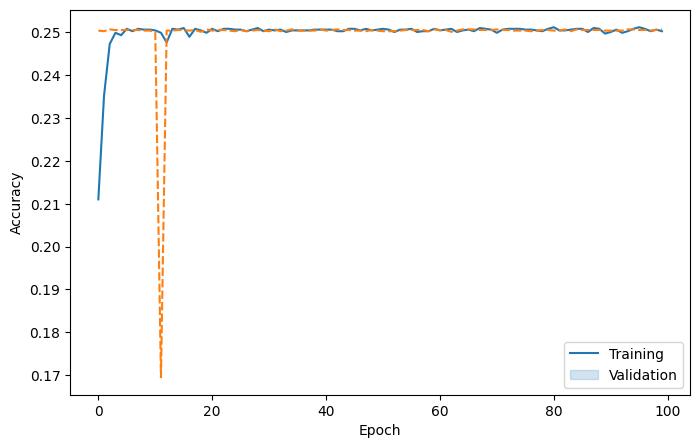

In [67]:
model_hist = pd.DataFrame(model_2.history)

plt.figure(figsize=(8, 5))
sns.lineplot(data=model_hist[['accuracy', 'val_accuracy']])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])

<AxesSubplot: >

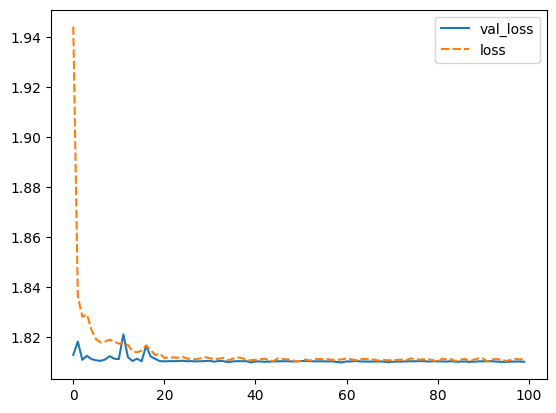

In [68]:
sns.lineplot(data=model_hist[['val_loss', 'loss']])


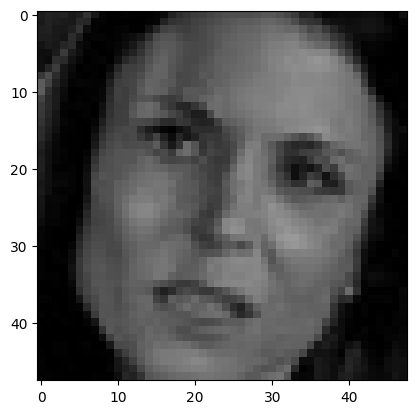

In [70]:
x_test, y_test = next(test_generator)
image_test = x_test[0]
image_test = image_test.reshape((1,) + image_test.shape)
plt.imshow(np.squeeze(image_test))

In [71]:
prediction=model2.predict(image_test)
print("The actual value is:  "+ label_map[np.argmax(y_test[0])])
print("The predection value is:  "+ label_map[np.argmax(prediction, axis=1)[0]])

The actual value is:  angry
The predection value is:  happy


# Model 3
- Model3 used data augmentation techniques for dealing with imbalanced data. Data augmention is one of the most common methodologies to reduce imbalanced data issues.



In [36]:
# Number of Images before applying data augmentation
len(os.listdir(r'C:\Users\P1\Desktop\Project\CNN\dataset\train\disgust'))

355

In [38]:

import imgaug as ia
import imgaug.augmenters as iaa
import os
from PIL import Image

# Define the augmentations to be applied
augmentations = iaa.Sequential([
    iaa.Flipud(0.5), # flip up-down with 50% probability
    iaa.Fliplr(0.5), # flip left-right with 50% probability
    iaa.Affine(rotate=(-45, 45)), # rotate between -45 and 45 degrees
    iaa.Multiply((0.8, 1.2)), # change brightness
    iaa.GaussianBlur(sigma=(0.0, 3.0)) # add Gaussian blur
])

# Define the path to the images folder
input_folder =  'dataset/train/disgust'


# Iterate through all images in the folder
for filename in os.listdir(input_folder):
    # Load the image
    image = Image.open(os.path.join(input_folder, filename))
    # Convert the image to a numpy array
    image = np.array(image)
    # Apply augmentations to the image
    augmented_images = augmentations.augment_images([image])
    # Save the augmented images
    for i, augmented_image in enumerate(augmented_images):
        Image.fromarray(augmented_image).save(
            os.path.join(input_folder, "aug_" + str(i) + "_" + filename)
        )






In [39]:
# Number of Images after applying data augmentation
len(os.listdir(r'C:\Users\P1\Desktop\Project\CNN\dataset\train\disgust'))

710

In [40]:
# Dimensions of the images
img_width, img_height = 48, 48

# Define the directories for the train, validation, and test data
train_data_dir = 'dataset/test'
validation_data_dir = 'dataset/val'
test_data_dir = 'dataset/train'



# Define data generators for the train, validation, and test data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1. / 255)

test_datagen = ImageDataGenerator(rescale=1. / 255)

# Generate the training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Generate the validation data
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Generate the test data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')



Found 5390 images belonging to 7 classes.
Found 7174 images belonging to 7 classes.
Found 23678 images belonging to 7 classes.


### Model 3 Building 

In [ ]:

# Define the model
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), input_shape=input_shape))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(32, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(64))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(nb_classes))
model3.add(Activation('softmax'))

model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Model Training

In [41]:


              
# Train the model
model_3=model3.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=nb_epoch,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

# Evaluate the model on the test data
score = model3.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/100


C:\Users\P1\AppData\Local\Temp\ipykernel_19824\3000520824.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_3=model3.fit_generator(


336/336 [==============================] - 6s 17ms/step - loss: 1.8437 - accuracy: 0.2352 - val_loss: 1.7999 - val_accuracy: 0.2525
Epoch 2/100
336/336 [==============================] - 6s 19ms/step - loss: 1.8067 - accuracy: 0.2467 - val_loss: 1.7471 - val_accuracy: 0.2733
Epoch 3/100
336/336 [==============================] - 6s 17ms/step - loss: 1.7540 - accuracy: 0.2760 - val_loss: 1.7119 - val_accuracy: 0.3128
Epoch 4/100
336/336 [==============================] - 5s 16ms/step - loss: 1.7232 - accuracy: 0.3046 - val_loss: 1.6528 - val_accuracy: 0.3337
Epoch 5/100
336/336 [==============================] - 5s 16ms/step - loss: 1.6917 - accuracy: 0.3186 - val_loss: 1.6279 - val_accuracy: 0.3694
Epoch 6/100
336/336 [==============================] - 5s 16ms/step - loss: 1.6594 - accuracy: 0.3389 - val_loss: 1.5911 - val_accuracy: 0.3564
Epoch 7/100
336/336 [==============================] - 6s 17ms/step - loss: 1.6171 - accuracy: 0.3582 - val_loss: 1.5943 - val_accuracy: 0.3842
Epoc

C:\Users\P1\AppData\Local\Temp\ipykernel_19824\3000520824.py:36: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model3.evaluate_generator(test_generator, nb_test_samples // batch_size)


Test loss: 1.4440051317214966
Test accuracy: 0.5070778727531433


### Performance Report

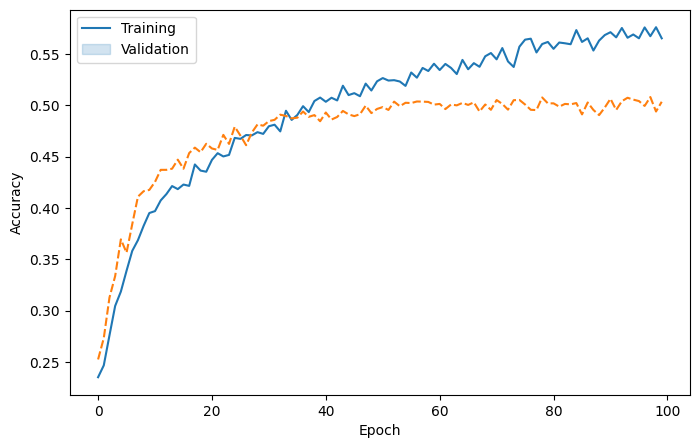

In [42]:
model_hist = pd.DataFrame(model_3.history)

plt.figure(figsize=(8, 5))
sns.lineplot(data=model_hist[['accuracy', 'val_accuracy']])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])

<AxesSubplot: >

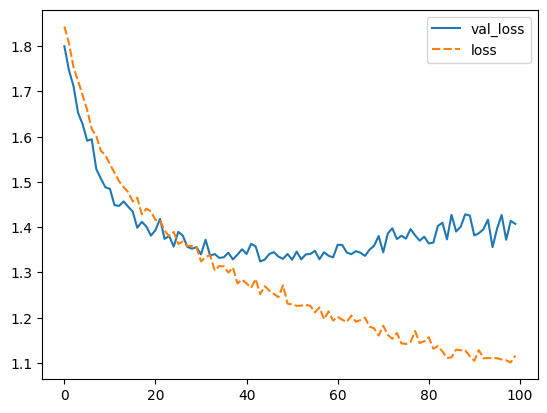

In [43]:
sns.lineplot(data=model_hist[['val_loss', 'loss']])


The actual value is:  surprise
The predection value is:  surprise


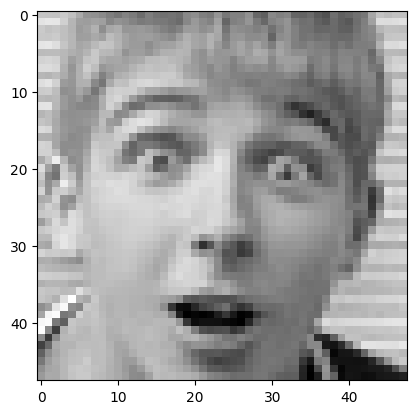

In [80]:
x_test, y_test = next(test_generator)
image_test = x_test[0]
image_test = image_test.reshape((1,) + image_test.shape)
plt.imshow(np.squeeze(image_test))
prediction=model3.predict(image_test)
print("The actual value is:  "+ label_map[np.argmax(y_test[0])])
print("The predection value is:  "+ label_map[np.argmax(prediction, axis=1)[0]])

In [ ]:
# model3.save('model3.h5')
# model2.save('model2.h5')

### Conclusion 
After training three different models with different approaches, it turns out the model 1 is worse than the other models, while model 1 and model 3 are close to each other.

### Error Analysis Section

The actual value is:  fear
The predection value is:  surprise


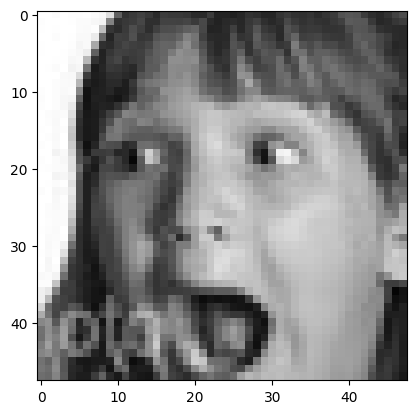

In [79]:
x_test, y_test = next(test_generator)
image_test = x_test[0]
image_test = image_test.reshape((1,) + image_test.shape)
plt.imshow(np.squeeze(image_test))
prediction=model3.predict(image_test)
print("The actual value is:  "+ label_map[np.argmax(y_test[0])])
print("The predection value is:  "+ label_map[np.argmax(prediction, axis=1)[0]])

The actual value is:  sad
The predection value is:  angry


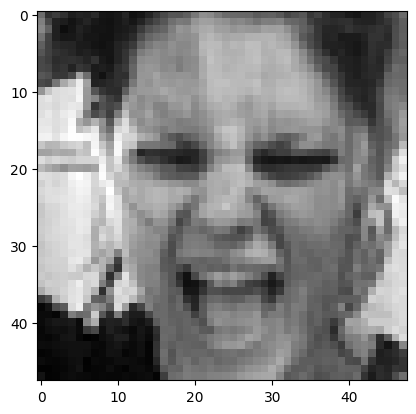

In [106]:
x_test, y_test = next(test_generator)
image_test = x_test[0]
image_test = image_test.reshape((1,) + image_test.shape)
plt.imshow(np.squeeze(image_test))
prediction=model3.predict(image_test)
print("The actual value is:  "+ label_map[np.argmax(y_test[0])])
print("The predection value is:  "+ label_map[np.argmax(prediction, axis=1)[0]])

The accuracy of the model is not very high, and the images are also confusing.
- First image The actual is fear, and the predicted is surprise, but actually, in the picture, it seems to be surprise.
- Socend image The actual is sad, and the predicted is angry, but actually, in the picture, it seems to be angry.

## Summary

In this project, a classification model built to classify Facial Expression. The prject go thrghuo multiple phases :Recognization
### EDA 
- In EDA phase i found that the data set actually imbalnced data which will strongly imapact on model pefrmence.
### Image Preproccessing: 
    1- rescale: scaling the pixel values of the images to a fixed range. The values are rescaled to be between 0 and 1. 

    2- Shear Range: Shear transformation is a type of image transformation that distorts the shape of an image. It is done by shifting one part of the image relative to the other part.

    3- zoom_range: Zooming is a type of image transformation that either zooms in or out of an image. 

### Model Building and Testing: 

- Model1: Training the model without additional technique such as transfer learning

- Model 2: Training the model with pretrained model that has been trained on VGG19 architecture.

- Model3 used data augmentation techniques for dealing with imbalanced data. Data augmention is one of the most common methodologies to reduce imbalanced data issues.